# Introduction


1. Exploratory Data Analysis followed by Feature Engineering 
2. Encoding and Cleaning Data
3. Training Machine Learning Models
4. Predictions and Generate Submission.csv

# 1. Data Exploratory 

Import needed Libraries 

In [81]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from IPython.core.display import HTML


Upload train and test data 

In [64]:
train = pd.read_csv('../input/spaceship-titanic/train.csv', index_col='PassengerId')
test = pd.read_csv('../input/spaceship-titanic/test.csv', index_col='PassengerId')

# Shape and preview
print('Train set shape:', train.shape)
print('Test set shape:', test.shape)
train.head()

Train set shape: (8693, 13)
Test set shape: (4277, 12)


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [79]:
def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

In [68]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


Predictors 
 1. Numeric 
 2. Categorical 

The Objective of the competition is to predict Transported
1. Transported 

The name 11th column is dropped because it does not help with the prediction. The code is then commented becuase I'm dropping by location. There is no column for Transported in the Test data set becuase this is a competition and our results will be evaluated upon submission. We are now going to look at the numeric and caegorical features and explore the data.  

In [66]:
##train.drop('Name', axis=1, inplace=True)
##test.drop('Name', axis=1, inplace=True)
##train = train.drop(train.columns[[11]], axis=1) 
##test = test.drop(test.columns[[11]], axis=1) 
# The name 

In [67]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 823.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non

There is no Transported in the Test data set becuase this wis Encode the data. After dropping Name , encode transporation false to 0 and true to 1

In [69]:
train['Transported'].replace(False, 0, inplace=True)
train['Transported'].replace(True, 1, inplace=True)

In [70]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

train_numeric_cols = train.select_dtypes(include=numerics)
train_numeric_cols

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...
9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,0
9278_01,18.0,0.0,0.0,0.0,0.0,0.0,0
9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,1


In [71]:
train_cat_cols = train.select_dtypes(object)

train_cat_cols

,HomePlanet,CryoSleep,Cabin,Destination,VIP
PassengerId,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,False
0003_01,Europa,False,A/0/S,TRAPPIST-1e,True
0003_02,Europa,False,A/0/S,TRAPPIST-1e,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,False
...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,True
9278_01,Earth,True,G/1499/S,PSO J318.5-22,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False


We have five categorial features and seven numeric features. 

In [72]:
cat_vars = ['HomePlanet', 'CryoSleep', 'Cabin', 'Desination', 'VIP', 'Name']
numeric_vars = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
target = 'Transported'

Analysis of the numeric features 

In [82]:
train_st = train[numeric_vars].describe()
test_st = test[numeric_vars].describe()
multi_table([train_st, test_st])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000
,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000


In [91]:
train_st

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


A correlation plot is run for the numeric features. 

<AxesSubplot:>

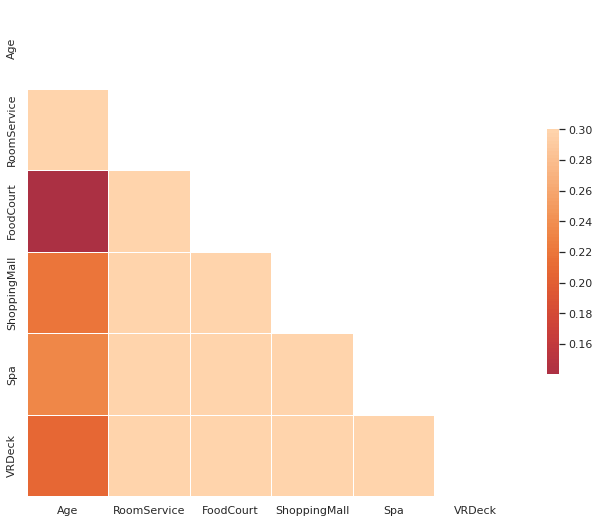

In [96]:
sns.set_theme(style="white")
corr = train_st.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Exploring the Categorical Features 

Passengers in crypto sleep fare better than those who are not. This is best in case of Europa ( 0.4 vs 0.99) .

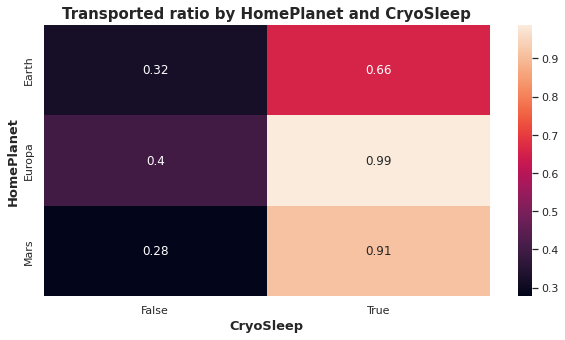

In [94]:

plt.subplots(figsize=(10, 5))
g = sns.heatmap(train.pivot_table(index='HomePlanet', columns='CryoSleep', values='Transported'), annot=True)
g.set_title('Transported ratio by HomePlanet and CryoSleep', weight='bold', size=15)
g.set_xlabel('CryoSleep', weight='bold', size=13)
g.set_ylabel('HomePlanet', weight='bold', size=13)
plt.show()

In [109]:
pd.crosstab([train.CryoSleep, train.Transported], train.HomePlanet,margins=True)

HomePlanet             Earth  Europa  Mars   All
CryoSleep Transported                           
False     0             2109     697   757  3563
          1              997     465   290  1752
True      0              475      10    59   544
          1              907     901   610  2418
All                     4488    2073  1716  8277

When people are in CryoSleep they are more likey to be transported. 

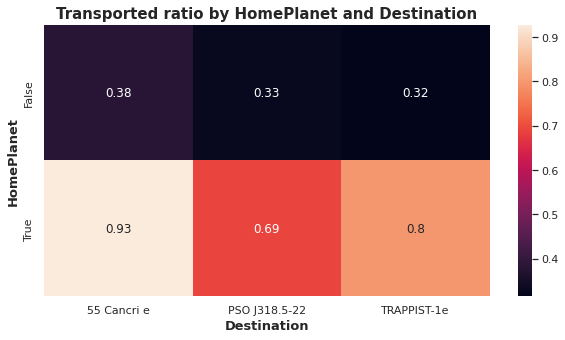

In [120]:
plt.subplots(figsize=(10, 5))
g = sns.heatmap(train.pivot_table(index='CryoSleep', columns='Destination', values='Transported'), annot=True)
g.set_title('Transported ratio by HomePlanet and Destination', weight='bold', size=15)
g.set_xlabel('Destination', weight='bold', size=13)
g.set_ylabel('HomePlanet', weight='bold', size=13)
plt.show()



In [107]:
pd.crosstab([train.Destination, train.Transported], train.HomePlanet,margins=True)

HomePlanet                 Earth  Europa  Mars   All
Destination   Transported                           
55 Cancri e   0              342     275    75   692
              1              348     611   118  1077
PSO J318.5-22 0              357       5    27   389
              1              355      14    22   391
TRAPPIST-1e   0             1894     434   720  3048
              1             1207     755   755  2717
All                         4503    2094  1717  8314

TRAPPIST-1e	 Is the most favoured destination.  Earth is the most favoured Home planet. Europa has the best sucess rate in transport. 

In [110]:
train[['deck','num', 'side']] = train['Cabin'].str.split('/', expand=True)
test[['deck','num', 'side']] = test['Cabin'].str.split('/', expand=True)

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

The Cabin feature has more information about the Deck, the number and the side on which a traveller is placed. These features taken sepertely may help to improve the model. 

It might also be of value to see if big spenders are more likely to be transported sucessfully. So we sum all the numeric fields other than age to create an expenditrue colun 

In [114]:
expenses = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train['tot_spending'] = train[expenses ].sum(axis=1)
test['tot_spending'] = test[expenses ].sum(axis=1)

We now take a look at our information rich data set that we can use for prediction

In [115]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,tot_spending
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0,P,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0,S,736.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,10383.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,5176.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0,A,98,P,8536.0
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0,G,1499,S,0.0
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1,G,1500,S,1873.0


In [116]:
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side,tot_spending
PassengerId,,,,,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S,0.0
0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S,2832.0
0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S,0.0
0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S,7418.0
0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,1496,S,0.0
9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN,1018.0
9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,D,296,P,0.0


In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
 11  deck          8494 non-null   object 
 12  num           8494 non-null   object 
 13  side          8494 non-null   object 
 14  tot_spending  8693 non-null   float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.3+ MB


In [118]:
train.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
deck            199
num             199
side            199
tot_spending      0
dtype: int64

In [119]:
test.isna().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
deck            100
num             100
side            100
tot_spending      0
dtype: int64

Counts of all the values in each the data set

In [12]:
null_cols = train.isnull().sum().sort_values(ascending=False)
null_cols = list(null_cols[null_cols>1].index)
null_cols

['CryoSleep',
 'ShoppingMall',
 'VIP',
 'HomePlanet',
 'deck',
 'num',
 'side',
 'VRDeck',
 'FoodCourt',
 'Spa',
 'Destination',
 'RoomService',
 'Age']

Check for columns with null values, as can be seen a number of columns have null values. There fore we have to encode and clean the data. 

In [121]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

train_final_numeric_cols = train.select_dtypes(include=numerics)
train_final_numeric_cols

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,tot_spending
PassengerId,,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0,0.0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1,736.0
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0,10383.0
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0,5176.0
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1,1091.0
...,...,...,...,...,...,...,...,...
9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,0,8536.0
9278_01,18.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,1,1873.0


We have added tot_spending as a numeric feature. This is helpful becuase people may not have paid for all the services and by creating this column we know their total expenses. 

In [122]:
train_final_cat_cols = train.select_dtypes(object)

train_final_cat_cols

,HomePlanet,CryoSleep,Destination,VIP,deck,num,side
PassengerId,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,False,B,0,P
0002_01,Earth,False,TRAPPIST-1e,False,F,0,S
0003_01,Europa,False,TRAPPIST-1e,True,A,0,S
0003_02,Europa,False,TRAPPIST-1e,False,A,0,S
0004_01,Earth,False,TRAPPIST-1e,False,F,1,S
...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,True,A,98,P
9278_01,Earth,True,PSO J318.5-22,False,G,1499,S
9279_01,Earth,False,TRAPPIST-1e,False,G,1500,S


The new categories of deck , num and side have been added. 

# 2. Encoding and Cleaning Data

We need to convert the object data type into category data type for the categorical features 

In [125]:
object_cols = [col for col in train.columns if train[col].dtype == 'object' or train[col].dtype == 'category']
numeric_cols = [col for col in train.columns if train[col].dtype == 'float64']

In [126]:
train[object_cols] = train[object_cols].astype('category')
test[object_cols] = test[object_cols].astype('category')

In [128]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8492 non-null   category
 1   CryoSleep     8476 non-null   category
 2   Destination   8511 non-null   category
 3   Age           8514 non-null   float64 
 4   VIP           8490 non-null   category
 5   RoomService   8512 non-null   float64 
 6   FoodCourt     8510 non-null   float64 
 7   ShoppingMall  8485 non-null   float64 
 8   Spa           8510 non-null   float64 
 9   VRDeck        8505 non-null   float64 
 10  Transported   8693 non-null   int64   
 11  deck          8494 non-null   category
 12  num           8494 non-null   category
 13  side          8494 non-null   category
 14  tot_spending  8693 non-null   float64 
dtypes: category(7), float64(7), int64(1)
memory usage: 1016.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277

train and test datasets are now prepared to run models

The ordinal endcoder is used to fit_transform the categorical values , new encoded test and train datasets are created. 

In [129]:
from sklearn.preprocessing import OrdinalEncoder

oc = OrdinalEncoder()

df_for_encode = pd.concat([train, test])

df_for_encode[object_cols] = df_for_encode[object_cols].astype('category')

df_for_encode[object_cols] = oc.fit_transform(df_for_encode[object_cols])

del train, test

train = df_for_encode.iloc[:8693, :]
test = df_for_encode.iloc[8693: , :]

del df_for_encode



since we conact the test and train during the encoding step we will find NAN values for the test transported column. This column needs to dropped. 

In [130]:
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,tot_spending
PassengerId,,,,,,,,,,,,,,,
0013_01,0.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6.0,1117.0,1.0,0.0
0018_01,0.0,0.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,NaN,5.0,1228.0,1.0,2832.0
0019_01,1.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,0.0,1.0,0.0
0021_01,1.0,0.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,NaN,2.0,1.0,1.0,7418.0
0023_01,0.0,0.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,NaN,5.0,1339.0,1.0,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,0.0,1.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6.0,553.0,1.0,0.0
9269_01,0.0,0.0,2.0,42.0,0.0,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN,NaN,1018.0
9271_01,2.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1113.0,0.0,0.0


In [131]:
test.drop('Transported', inplace=True, axis=1)

In [132]:
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side,tot_spending
PassengerId,,,,,,,,,,,,,,
0013_01,0.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1117.0,1.0,0.0
0018_01,0.0,0.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,5.0,1228.0,1.0,2832.0
0019_01,1.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
0021_01,1.0,0.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,2.0,1.0,1.0,7418.0
0023_01,0.0,0.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,5.0,1339.0,1.0,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,0.0,1.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,553.0,1.0,0.0
9269_01,0.0,0.0,2.0,42.0,0.0,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN,1018.0
9271_01,2.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1113.0,0.0,0.0


The fully encoded test data set after dropping the transported column. 

Replace missing values with the mean values of that column. We could also use median values to further improve the score. We use the imputer to impute the mean values. 

In [137]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


ct = ColumnTransformer([("imp", SimpleImputer(strategy='mean'), null_cols)])
    
train[null_cols] = ct.fit_transform(train[null_cols])
test[null_cols] = ct.fit_transform(test[null_cols])

# 3. Training machine learning models

 Divide train 70% test 30% from train dataset for training model again.
 Define variable that are used as the X - Predictors and Y - Transported ( outcome variable) 

In [138]:
X = train.copy()
y = X.pop('Transported')

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

import and implement the catboost classifier for trainig the model 

In [19]:
!pip3 install catboost

The following four models are compared to determine the model with the best predictive performance. 
1. RandomForestClassifier
2. AdaBoostClassifier
3. XGBClassifier
4. CatBoostClassifier

Rationale for Model Selection. 

RandomForestClassifier is based on the principle of Random Forest which consist of a multitude of decision trees.  Each Tree model will receive a different dataset. This data set is a subset of all datasets. Each decision tree make a prediction. The predictions are polled and the most popular prediction is considered to be the model prediction. 

AdaBoostClassifier is a Decision Tree that has a single class. Many instances for the tree train together in a chain. With each training cycle, the data weights are assigned to each classifier output. The classifier instance learns from those weights. I


* XGBClassifier or Extreme Gradient Boosting uses an ensamble of shallow trees. Each iteration uses the error residuals of the previous model to fit the new model. 

CatBoost is based on gradient boosted decision trees. During training, a set of decision trees is built consecutively. Each successive tree is built with reduced loss compared to the previous trees

import training models 


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
model_list= {}
def predict_and_acc(model, verbose=None):
    
    if verbose == None:
        model = model()
        model.fit(X_train, y_train)
        predict = model.predict(X_test)
        cvs = cross_val_score(model, X, y, cv=4)
        print(f'The accuracy score of {str(model)} is {float(accuracy_score(y_test, predict))}')
        print(f'The cross validation of {str(model)} is:{cvs} with mean of {cvs.mean()}')
    else:
        model = model(verbose=verbose)
        model.fit(X_train, y_train)
        predict = model.predict(X_test)
        cvs = cross_val_score(model, X, y, cv=4)
        print(f'The accuracy score of {str(model)} is {float(accuracy_score(y_test, predict))}')
        print(f'The cross validation of {str(model)} is:{cvs} with mean of {cvs.mean()}')

In [21]:
predict_and_acc(RandomForestClassifier, None)

The accuracy score of RandomForestClassifier() is 0.7980680772769089
The cross validation of RandomForestClassifier() is:[0.76448942 0.76622181 0.79889554 0.77910723] with mean of 0.7771784986860995


In [22]:
predict_and_acc(AdaBoostClassifier)

The accuracy score of AdaBoostClassifier() is 0.7980680772769089
The cross validation of AdaBoostClassifier() is:[0.74931003 0.78416935 0.79337322 0.80901979] with mean of 0.7839680959471239


In [23]:
predict_and_acc(XGBClassifier)

The accuracy score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) is 0.7948482060717571
The cross validation of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=

In [24]:
predict_and_acc(CatBoostClassifier, verbose=False)

The accuracy score of <catboost.core.CatBoostClassifier object at 0x7f33f1cfc590> is 0.8054277828886844
The cross validation of <catboost.core.CatBoostClassifier object at 0x7f33f1cfc590> is:[0.76310948 0.78324896 0.82144501 0.7947538 ] with mean of 0.7906393109208905


In [30]:
from sklearn.feature_selection import SequentialFeatureSelector

model_fs = CatBoostClassifier(verbose=False)
sf = SequentialFeatureSelector(model_fs, scoring='accuracy', direction = 'backward')
sf.fit(X,y)

SequentialFeatureSelector(direction='backward',
                          estimator=<catboost.core.CatBoostClassifier object at 0x7f33f9cc3f90>,
                          scoring='accuracy')

In [26]:
best_features = list(sf.get_feature_names_out())
best_features

['CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'deck', 'side', 'SumSpends']

In [27]:
model = CatBoostClassifier(verbose=False, eval_metric='Accuracy')
model.fit(X[best_features], y)
prediction = model.predict(test[best_features])

In [28]:
final = pd.DataFrame()
final.index = test.index
final['Transported'] = prediction
final['Transported'].replace(0, False, inplace=True)
final['Transported'].replace(1, True, inplace=True)
final

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [29]:
final.to_csv('submission.csv')